### Load image and label

In [1]:
import os
import numpy as np

path = '.\\Dataset\\Training_Evaluation_Dataset\\Training Dataset\\'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if ".avi" in file:
            files.append(os.path.join(r, file))
        
for f in files:
    print(f)
np.array(files).shape

.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\glasses\nonsleepyCombination.avi
.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\glasses\sleepyCombination.avi
.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\glasses\slowBlinkWithNodding.avi
.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\glasses\yawning.avi
.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\nightglasses\nonsleepyCombination.avi
.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\nightglasses\sleepyCombination.avi
.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\nightglasses\slowBlinkWithNodding.avi
.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\nightglasses\yawning.avi
.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\night_noglasses\nonsleepyCombination.avi
.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\night_noglasses\sleepyCombination.avi
.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\night_noglasses\slow

(356,)

### MTCNN

In [4]:
'''
from mtcnn.mtcnn import MTCNN
import cv2

img = cv2.imread("frame0.jpg")
detector = MTCNN()
print(detector.detect_faces(img))
'''

[{'box': [173, 114, 215, 259], 'confidence': 0.9999260902404785, 'keypoints': {'left_eye': (208, 210), 'right_eye': (300, 204), 'nose': (233, 256), 'mouth_left': (217, 319), 'mouth_right': (285, 314)}}]


### Crop image and Label

[HAAR Classifier](http://blog.topspeedsnail.com/archives/10511)
- haarcascade_frontalface_default(想法: 直接用這個切出臉部的框框)
- haarcascade_eye
- problem: 多個人臉的問題防範
- 用landmark下去+圈，否則會不夠精準

### <p style="color:red;">1. HAAR Classifier

In [8]:
import numpy as np
import cv2
import time

#==================Detector
face_haar = cv2.CascadeClassifier(".\Tool\Detecter\haarcascade_frontalface_default.xml")
eye_haar = cv2.CascadeClassifier(".\Tool\Detecter\haarcascade_eye.xml")
mouth_haar = cv2.CascadeClassifier(".\Tool\Detecter\haarcascade_mcs_mouth.xml")
nose_haar = cv2.CascadeClassifier(".\Tool\Detecter\haarcascade_mcs_nose.xml")
#==================

filename = '.\\Dataset\\Training_Evaluation_Dataset\\Training Dataset\\001\\glasses\\yawning.avi'
cap = cv2.VideoCapture(filename)

while(cap.isOpened()):
    
    start_time = time.time()
    
    ret, frame = cap.read()
    #print(type(frame))
    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #===========Detect global part and local part by haar
    faces = face_haar.detectMultiScale(gray_img, 1.3, 5)
    #faces = face_haar.detectMultiScale(gray_img,scaleFactor=1.15,minNeighbors=5,minSize=(5,5),flags = cv2.CASCADE_SCALE_IMAGE)
    for face_x,face_y,face_w,face_h in faces:
        cv2.rectangle(frame, (face_x, face_y), (face_x+face_w, face_y+face_h), (0,255,0), 2)
            # 眼长在脸上
        roi_gray_img = gray_img[face_y:face_y+face_h, face_x:face_x+face_w]
        roi_img = frame[face_y:face_y+face_h, face_x:face_x+face_w]

        eyes = eye_haar.detectMultiScale(roi_gray_img, 1.3, 5)
        for eye_x,eye_y,eye_w,eye_h in eyes:
            cv2.rectangle(roi_img, (eye_x,eye_y), (eye_x+eye_w, eye_y+eye_h), (255,0,0), 2)

        noses = nose_haar.detectMultiScale(roi_gray_img, 1.7, 5)
        for nose_x,nose_y,nose_w,nose_h in noses:
            cv2.rectangle(roi_img, (nose_x,nose_y), (nose_x+nose_w, nose_y+nose_h), (255,0,255), 2)

        mouthes = mouth_haar.detectMultiScale(roi_gray_img, 1.5, 7)
        for mouth_x,mouth_y,mouth_w,mouth_h in mouthes:
            cv2.rectangle(roi_img, (mouth_x,mouth_y), (mouth_x+mouth_w, mouth_y+mouth_h), (255,255,0), 2)
            
    print("FPS: ", 1.0 / (time.time() - start_time))    
                
    cv2.imshow('frame',frame)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

FPS:  28.6486390492128
FPS:  50.24021081631431
FPS:  41.71154094774004
FPS:  41.84136548187903
FPS:  45.5833242767405
FPS:  43.593489512960694
FPS:  52.77580089085739
FPS:  43.599380463820545
FPS:  15.666873351810487
FPS:  47.751536955234755
FPS:  58.984151091985545
FPS:  38.5473995717266
FPS:  30.3743581944716
FPS:  45.57589455497723
FPS:  58.989128447463536
FPS:  62.68107300306359
FPS:  62.675453146247065
FPS:  45.593729957714174
FPS:  47.75044969147749
FPS:  63.469281520489076
FPS:  50.56302439965281
FPS:  63.49810760892603
FPS:  59.72665005339979
FPS:  63.41937825087698
FPS:  45.58679230928082
FPS:  50.58436750003015
FPS:  48.10478145680173
FPS:  43.65883210159259
FPS:  63.25868725868726
FPS:  56.39097056965004
FPS:  58.956790644063986
FPS:  40.10809466889792
FPS:  18.92992733673331
FPS:  62.86803765213742
FPS:  55.72122806318335
FPS:  52.75787725940554
FPS:  52.84295667292404
FPS:  47.743927148548664
FPS:  52.79506576877085
FPS:  45.872476321718395
FPS:  50.2209610019517
FPS:  55.

### <p style="color:red;"> 2. Landmark

[Dlib vs Haar](https://hardliver.blogspot.com/2017/07/dlib-dlib.html)<br>
演算法是HOG加上Linear SVM
<p style="color:red;">加入FaceAligner


- [reference](https://github.com/italojs/facial-landmarks-recognition-)
- [find max value of the same index](https://stackoverflow.com/questions/39748916/find-maximum-value-and-index-in-a-python-list)<br>
解釋了為什麼要再用CNN，因為landmark無法偵測得很精準。<br>
1~27: 臉部輪廓<br>
28~36:鼻子<br>
37~42:左眼<br>43~48:右眼<br>
49~68:嘴巴<br>

![](https://i.imgur.com/f341aB4.jpg)

In [6]:
# import the necessary packages
from imutils import face_utils
import dlib
import cv2
import os 
import numpy as np
from operator import itemgetter
import time

DefaultPath = '.\\Dataset\\'

   
     
#==============================================================

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

filename = '.\\Dataset\\Training_Evaluation_Dataset\\Training Dataset\\001\\glasses\\yawning.avi'
print(filename)
cap = cv2.VideoCapture(filename)

#================================================================ create new folder

while(cap.isOpened()):
    
    start_time = time.time()
    
    # load the input image and convert it to grayscale
    ret, image = cap.read()
    height,width = image.shape[:2]
    image = cv2.resize(image,(width//2,height//2),interpolation=cv2.INTER_CUBIC)
    if (not ret):
      break
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
        
    # detect faces in the grayscale image
    rects = detector(gray, 0)
    
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        
        for (x, y) in shape:
            #count = count+1
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
            #if(count>=49 and count<=69):
                #cv2.putText(image,str(count), (x+2 , y+2 ), cv2.FONT_HERSHEY_COMPLEX,0.5, (0, 255, 255))

        
        #==================================================
        
        '''
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (255, 0, 0), -1)
        '''    
    # show the output image with the face detections + facial landmarks
    
    print("FPS: ", 1.0 / (time.time() - start_time))
    
    cv2.imshow("Output", image)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
    
cv2.destroyAllWindows()
cap.release()

.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\glasses\yawning.avi
FPS:  45.531861308321936
FPS:  47.736863070917224
FPS:  52.77314476962178
FPS:  55.71900738615229
FPS:  47.77057208915616
FPS:  55.70642689227418
FPS:  55.70346760163088
FPS:  59.0406103517687
FPS:  58.84512535600545
FPS:  59.05973133571771
FPS:  59.01236721772775
FPS:  55.7649373786795
FPS:  43.6043663582493
FPS:  50.25465786415212
FPS:  55.589036738588774
FPS:  59.5249137845394
FPS:  62.54927225005965
FPS:  63.40308073707919
FPS:  63.29114229666516
FPS:  59.51477829017382
FPS:  56.19227780606093
FPS:  52.81767009608241
FPS:  50.133320583770605
FPS:  52.90094089751028
FPS:  55.70494720764991
FPS:  52.7684972007297
FPS:  41.77968144554791
FPS:  52.77248078108683
FPS:  58.988298829882986
FPS:  45.58183813860482
FPS:  59.049753625228774
FPS:  55.705687040136
FPS:  62.672643595720515
FPS:  58.983321614400225
FPS:  58.97834523876484
FPS:  52.77447279681917
FPS:  62.65766357932477
FPS:  58.980003937340044
FPS:  5

In [9]:
# import the necessary packages
from imutils import face_utils
import dlib
import cv2
import numpy as np
from operator import itemgetter
import time

DefaultPath = '.\\Dataset\\'

def CreateFolder(name):
    try:
        # creating a folder named data 
        if not os.path.exists(name):
            os.makedirs(name)
        # if not created then raise error 
    except OSError: 
        print ('Error: Creating directory of data')        
        
#==============================================================

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

filename = '.\\Dataset\\Training_Evaluation_Dataset\\Training Dataset\\001\\glasses\\yawning.avi'
print(filename)
cap = cv2.VideoCapture(filename)

#================================================================ create new folder
CreateFolder(DefaultPath+"face")
CreateFolder(DefaultPath+"lefteye")
CreateFolder(DefaultPath+"righteye")
CreateFolder(DefaultPath+"nose")
CreateFolder(DefaultPath+"mouth")
#================================================================
Face_ImageDataList = []

currentframe = 0

while(cap.isOpened()):
    
    start_time = time.time()
    
    currentframe += 1
    # load the input image and convert it to grayscale
    ret, image = cap.read()
    height,width = image.shape[:2]
    image = cv2.resize(image,(width//2,height//2),interpolation=cv2.INTER_CUBIC)
    
    if (not ret):
      break
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
        
    # detect faces in the grayscale image
    rects = detector(gray, 0)
    
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        
        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        #count = 0
        face_x = face_y = 0
        
        #face_y = face_y-1
        #face_x = face_x+1
        #print(str(face_x)+" "+str(face_y))
        
        '''
        for (x, y) in shape:
            #count = count+1
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
            #if():
            
            #if(count>=49 and count<=69):
                #cv2.putText(image,str(count), (x+2 , y+2 ), cv2.FONT_HERSHEY_COMPLEX,0.5, (0, 255, 255))
        '''
        
        #print(shape[0:3][0])
        #print(shape[1:10])
        #index, value = max(shape[1:10], key=lambda item: item[1])
       
        #max_value = max(shape[1:10], key=itemgetter(1))[0]
        #print(value)
        
        #print(max(shape[0:28], key=itemgetter(0))[0])#find max value of x 
        #print(max(shape[0:28], key=itemgetter(1))[1])#find max value of y 
        
        #==================================================Detect local part and global part
        face_max_x = max(shape[0:27], key=itemgetter(0))[0]+15
        face_min_x = min(shape[0:27], key=itemgetter(0))[0]-15
        face_max_y = max(shape[0:27], key=itemgetter(1))[1]+15
        face_min_y = min(shape[0:27], key=itemgetter(1))[1]-15
        face_image = image[face_min_y:face_max_y,face_min_x:face_max_x]
        #face_image = cv2.resize(face_image,(64,64),interpolation=cv2.INTER_AREA)
        #cv2.imwrite(DefaultPath + "face/frame" + str(currentframe) + '.jpg',face_image) 
        #Face_ImageDataList.append(face_image)
        cv2.rectangle(image,(face_min_x,face_min_y),(face_max_x,face_max_y),(0, 255, 255),2)
        
        
        
        nose_max_x = max(shape[27:36], key=itemgetter(0))[0]+15
        nose_min_x = min(shape[27:36], key=itemgetter(0))[0]-15
        nose_max_y = max(shape[27:36], key=itemgetter(1))[1]+10
        nose_min_y = min(shape[27:36], key=itemgetter(1))[1]
        nose_image = image[nose_min_y:nose_max_y,nose_min_x:nose_max_x]
        #cv2.imwrite(DefaultPath + "nose/frame" + str(currentframe) + '.jpg',nose_image)
        cv2.rectangle(image,(nose_min_x,nose_min_y),(nose_max_x,nose_max_y),(255, 255, 0),2)
        
        lefteye_max_x = max(shape[36:42], key=itemgetter(0))[0]+15
        lefteye_min_x = min(shape[36:42], key=itemgetter(0))[0]-15
        lefteye_max_y = max(shape[36:42], key=itemgetter(1))[1]+15
        lefteye_min_y = min(shape[36:42], key=itemgetter(1))[1]-15
        lefteye_image = image[lefteye_min_y:lefteye_max_y,lefteye_min_x:lefteye_max_x]
        #cv2.imwrite(DefaultPath + "lefteye/frame" + str(currentframe) + '.jpg',lefteye_image)
        cv2.rectangle(image,(lefteye_min_x,lefteye_min_y),(lefteye_max_x,lefteye_max_y),(255, 0, 0),2)
        
        righteye_max_x = max(shape[42:48], key=itemgetter(0))[0]+15
        righteye_min_x = min(shape[42:48], key=itemgetter(0))[0]-15
        righteye_max_y = max(shape[42:48], key=itemgetter(1))[1]+15
        righteye_min_y = min(shape[42:48], key=itemgetter(1))[1]-15
        righteye_image = image[righteye_min_y:righteye_max_y,righteye_min_x:righteye_max_x]
        #cv2.imwrite(DefaultPath + "righteye/frame" + str(currentframe) + '.jpg',righteye_image)
        cv2.rectangle(image,(righteye_min_x,righteye_min_y),(righteye_max_x,righteye_max_y),(255, 255, 255),2)
        
        mouth_max_x = max(shape[48:], key=itemgetter(0))[0]+15
        mouth_min_x = min(shape[48:], key=itemgetter(0))[0]-15
        mouth_max_y = max(shape[48:], key=itemgetter(1))[1]+15
        mouth_min_y = min(shape[48:], key=itemgetter(1))[1]-15
        mouth_image = image[mouth_min_y:mouth_max_y,mouth_min_x:mouth_max_x]
        #cv2.imwrite(DefaultPath + "mouth/frame" + str(currentframe) + '.jpg',mouth_image)
        cv2.rectangle(image,(mouth_min_x,mouth_min_y),(mouth_max_x,mouth_max_y),(255, 0, 255),2)
        
        #if(currentframe%100==0):
        #    print ('Creating frame' + str(currentframe)) 
        #==================================================
        
        '''
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (255, 0, 0), -1)
        '''    
    # show the output image with the face detections + facial landmarks
    
    cv2.imshow("Output", image)
    cv2.imshow("face_image", face_image)
    cv2.imshow("nose_image", nose_image)
    cv2.imshow("lefteye_image", lefteye_image)
    cv2.imshow("righteye_image", righteye_image)
    cv2.imshow("mouth_image", mouth_image)
    
    print("FPS: ", 1.0 / (time.time() - start_time))
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
    
cv2.destroyAllWindows()
cap.release()

.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\glasses\yawning.avi
FPS:  3.626188973518808
FPS:  47.74447062573279
FPS:  18.65901497862421
FPS:  16.652786380167388
FPS:  36.04840484048405
FPS:  34.76019359543857
FPS:  38.15987044416544
FPS:  39.39830357226726
FPS:  36.77472074631315
FPS:  42.08571055879431
FPS:  34.60389905040055
FPS:  18.205787753436667
FPS:  42.1216357355186
FPS:  45.65079779707874
FPS:  41.803833235326366
FPS:  40.12037152176617
FPS:  40.81253284032305
FPS:  43.692032042668004
FPS:  50.26489621782273
FPS:  41.79883402262195
FPS:  43.61615573395449
FPS:  46.237077375899815
FPS:  48.20263405888708
FPS:  41.84637487404097
FPS:  38.487621354768855
FPS:  43.59031812182372
FPS:  43.58261809264532
FPS:  41.78009761928479
FPS:  43.91665445102925
FPS:  45.73741603419698
FPS:  43.26879590657754
FPS:  40.14686907747382
FPS:  43.68429604016081
FPS:  50.166899900726015
FPS:  45.25820339897491
FPS:  52.848283248283245
FPS:  45.63440719826789
FPS:  45.58084743368217
FP

### MTCNN 

In [21]:
from mtcnn.mtcnn import MTCNN
# import the necessary packages
from imutils import face_utils
import dlib
import cv2
import numpy as np
import os
from operator import itemgetter
import time


DefaultPath = '.\\Dataset\\'
detector = MTCNN()

def CreateFolder(name):
    try:
        # creating a folder named data 
        if not os.path.exists(name):
            os.makedirs(name)
        # if not created then raise error 
    except OSError: 
        print ('Error: Creating directory of data')        
        
#==============================================================

filename = '.\\Dataset\\Training_Evaluation_Dataset\\Training Dataset\\001\\glasses\\yawning.avi'
print(filename)
cap = cv2.VideoCapture(filename)

# img = cv2.imread("me.jpg")
detector = MTCNN()

#================================================================ create new folder
CreateFolder(DefaultPath+"face")
CreateFolder(DefaultPath+"lefteye")
CreateFolder(DefaultPath+"righteye")
CreateFolder(DefaultPath+"nose")
CreateFolder(DefaultPath+"mouth")
#================================================================
Face_ImageDataList = []

currentframe = 0

while(cap.isOpened()):
    
    start_time = time.time()
    
    currentframe += 1
    # load the input image and convert it to grayscale
    ret, image = cap.read()
    if (not ret):
      break
    
    height,width = image.shape[:2]
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = cv2.resize(image,(width//2,height//2),interpolation=cv2.INTER_CUBIC)
    print(image.shape[:2])
    faces = detector.detect_faces(image)
    print(np.array(faces).shape[0])
    for face in faces:
        x,y,w,h = face['box']
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        
        
        cv2.rectangle(image, (face['keypoints']['left_eye'][0]-int(w*0.2), face['keypoints']['left_eye'][1]-int(h*0.2)),
                      (face['keypoints']['right_eye'][0]+int(w*0.2), face['keypoints']['right_eye'][1]+int(h*0.2)),(0, 255, 0),2)
        
        cv2.rectangle(image, (face['keypoints']['mouth_left'][0]-int(w*0.2), face['keypoints']['mouth_left'][1]-int(h*0.2)),
                      (face['keypoints']['mouth_right'][0]+int(w*0.2), face['keypoints']['mouth_right'][1]+int(h*0.2)),(0, 255, 0),2)
        
        
        #cv2.rectangle(image, (face['keypoints']['left_eye'][0], face['keypoints']['left_eye'][1]), 2, (0, 255, 0), -1)
        
        
        cv2.circle(image, (face['keypoints']['left_eye'][0], face['keypoints']['left_eye'][1]), 2, (0, 255, 0), -1)
        cv2.circle(image, (face['keypoints']['right_eye'][0], face['keypoints']['right_eye'][1]), 2, (0, 255, 0), -1)
        cv2.circle(image, (face['keypoints']['nose'][0], face['keypoints']['nose'][1]), 2, (0, 255, 0), -1)
        cv2.circle(image, (face['keypoints']['mouth_left'][0], face['keypoints']['mouth_left'][1]), 2, (0, 255, 0), -1)
        cv2.circle(image, (face['keypoints']['mouth_right'][0], face['keypoints']['mouth_right'][1]), 2, (0, 255, 0), -1)
        
        
    cv2.imshow('img',image)
    
    print("FPS: ", 1.0 / (time.time() - start_time))
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

.\Dataset\Training_Evaluation_Dataset\Training Dataset\001\glasses\yawning.avi
(480, 640)
1
FPS:  4.476101442408254
(480, 640)
1
FPS:  11.93469118308208
(480, 640)
1
FPS:  13.021623517943018
(480, 640)
1
FPS:  12.855434352845982
(480, 640)
1
FPS:  13.736413595247296
(480, 640)
1
FPS:  12.23481916007666
(480, 640)
1
FPS:  12.862491106695126
(480, 640)
1
FPS:  13.742084294401343
(480, 640)
1
FPS:  13.35208559486329
(480, 640)
1
FPS:  13.51536399257579
(480, 640)
1
FPS:  13.377978649094326
(480, 640)
1
FPS:  12.385877461344926
(480, 640)
1
FPS:  13.551651831149739
(480, 640)
1
FPS:  14.747230260220173
(480, 640)
1
FPS:  12.381197529843785
(480, 640)
1
FPS:  14.00182938635438
(480, 640)
1
FPS:  14.348821456672711
(480, 640)
1
FPS:  13.21864974062565
(480, 640)
1
FPS:  13.58303053855371
(480, 640)
1
FPS:  13.766440415392088
(480, 640)
1
FPS:  13.343123095227492
(480, 640)
1
FPS:  13.37729596637101
(480, 640)
1
FPS:  13.364636306860909
(480, 640)
1
FPS:  13.026800217408184
(480, 640)
1
FPS: 

### Load Label

In [1]:
import numpy as np
#注意開頭是數字的資料夾或檔案
labelfile = '.\Dataset\Training_Evaluation_Dataset\Training Dataset\\001\glasses\\001_yawning_drowsiness.txt'
LabelList = []

inputfile = open(labelfile, 'r').read()


LabelList = list(map(int, inputfile))
Labelarray = np.array(LabelList)
Labelarray.shape

(1850,)

### test

In [3]:
# Importing all necessary libraries 
import cv2 
import os 
  
# Read the video from specified path 
cam = cv2.VideoCapture('.\Dataset\Training_Evaluation_Dataset\Training Dataset\\001\glasses\yawning.avi') 
  
try: 
      
    # creating a folder named data 
    if not os.path.exists('data'): 
        os.makedirs('data') 
  
# if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data') 
  
# frame 
currentframe = 0
  
while(True): 
      
    # reading from frame 
    ret,frame = cam.read() 
  
    if ret: 
        # if video is still left continue creating images 
        name = './data/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name) 
  
        # writing the extracted images 
        cv2.imwrite(name, frame) 
  
        # increasing counter so that it will 
        # show how many frames are created 
        currentframe += 1
    else: 
        break
  
# Release all space and windows once done 
cam.release() 
cv2.destroyAllWindows() 

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg
Creating..../data/frame9.jpg
Creating..../data/frame10.jpg
Creating..../data/frame11.jpg
Creating..../data/frame12.jpg
Creating..../data/frame13.jpg
Creating..../data/frame14.jpg
Creating..../data/frame15.jpg
Creating..../data/frame16.jpg
Creating..../data/frame17.jpg
Creating..../data/frame18.jpg
Creating..../data/frame19.jpg
Creating..../data/frame20.jpg
Creating..../data/frame21.jpg
Creating..../data/frame22.jpg
Creating..../data/frame23.jpg
Creating..../data/frame24.jpg
Creating..../data/frame25.jpg
Creating..../data/frame26.jpg
Creating..../data/frame27.jpg
Creating..../data/frame28.jpg
Creating..../data/frame29.jpg
Creating..../data/frame30.jpg
Creating..../data/frame31.jpg
Creating..../data/frame32.jpg
Creating..../data/fr

Creating..../data/frame278.jpg
Creating..../data/frame279.jpg
Creating..../data/frame280.jpg
Creating..../data/frame281.jpg
Creating..../data/frame282.jpg
Creating..../data/frame283.jpg
Creating..../data/frame284.jpg
Creating..../data/frame285.jpg
Creating..../data/frame286.jpg
Creating..../data/frame287.jpg
Creating..../data/frame288.jpg
Creating..../data/frame289.jpg
Creating..../data/frame290.jpg
Creating..../data/frame291.jpg
Creating..../data/frame292.jpg
Creating..../data/frame293.jpg
Creating..../data/frame294.jpg
Creating..../data/frame295.jpg
Creating..../data/frame296.jpg
Creating..../data/frame297.jpg
Creating..../data/frame298.jpg
Creating..../data/frame299.jpg
Creating..../data/frame300.jpg
Creating..../data/frame301.jpg
Creating..../data/frame302.jpg
Creating..../data/frame303.jpg
Creating..../data/frame304.jpg
Creating..../data/frame305.jpg
Creating..../data/frame306.jpg
Creating..../data/frame307.jpg
Creating..../data/frame308.jpg
Creating..../data/frame309.jpg
Creating

Creating..../data/frame545.jpg
Creating..../data/frame546.jpg
Creating..../data/frame547.jpg
Creating..../data/frame548.jpg
Creating..../data/frame549.jpg
Creating..../data/frame550.jpg
Creating..../data/frame551.jpg
Creating..../data/frame552.jpg
Creating..../data/frame553.jpg
Creating..../data/frame554.jpg
Creating..../data/frame555.jpg
Creating..../data/frame556.jpg
Creating..../data/frame557.jpg
Creating..../data/frame558.jpg
Creating..../data/frame559.jpg
Creating..../data/frame560.jpg
Creating..../data/frame561.jpg
Creating..../data/frame562.jpg
Creating..../data/frame563.jpg
Creating..../data/frame564.jpg
Creating..../data/frame565.jpg
Creating..../data/frame566.jpg
Creating..../data/frame567.jpg
Creating..../data/frame568.jpg
Creating..../data/frame569.jpg
Creating..../data/frame570.jpg
Creating..../data/frame571.jpg
Creating..../data/frame572.jpg
Creating..../data/frame573.jpg
Creating..../data/frame574.jpg
Creating..../data/frame575.jpg
Creating..../data/frame576.jpg
Creating

Creating..../data/frame821.jpg
Creating..../data/frame822.jpg
Creating..../data/frame823.jpg
Creating..../data/frame824.jpg
Creating..../data/frame825.jpg
Creating..../data/frame826.jpg
Creating..../data/frame827.jpg
Creating..../data/frame828.jpg
Creating..../data/frame829.jpg
Creating..../data/frame830.jpg
Creating..../data/frame831.jpg
Creating..../data/frame832.jpg
Creating..../data/frame833.jpg
Creating..../data/frame834.jpg
Creating..../data/frame835.jpg
Creating..../data/frame836.jpg
Creating..../data/frame837.jpg
Creating..../data/frame838.jpg
Creating..../data/frame839.jpg
Creating..../data/frame840.jpg
Creating..../data/frame841.jpg
Creating..../data/frame842.jpg
Creating..../data/frame843.jpg
Creating..../data/frame844.jpg
Creating..../data/frame845.jpg
Creating..../data/frame846.jpg
Creating..../data/frame847.jpg
Creating..../data/frame848.jpg
Creating..../data/frame849.jpg
Creating..../data/frame850.jpg
Creating..../data/frame851.jpg
Creating..../data/frame852.jpg
Creating

Creating..../data/frame1087.jpg
Creating..../data/frame1088.jpg
Creating..../data/frame1089.jpg
Creating..../data/frame1090.jpg
Creating..../data/frame1091.jpg
Creating..../data/frame1092.jpg
Creating..../data/frame1093.jpg
Creating..../data/frame1094.jpg
Creating..../data/frame1095.jpg
Creating..../data/frame1096.jpg
Creating..../data/frame1097.jpg
Creating..../data/frame1098.jpg
Creating..../data/frame1099.jpg
Creating..../data/frame1100.jpg
Creating..../data/frame1101.jpg
Creating..../data/frame1102.jpg
Creating..../data/frame1103.jpg
Creating..../data/frame1104.jpg
Creating..../data/frame1105.jpg
Creating..../data/frame1106.jpg
Creating..../data/frame1107.jpg
Creating..../data/frame1108.jpg
Creating..../data/frame1109.jpg
Creating..../data/frame1110.jpg
Creating..../data/frame1111.jpg
Creating..../data/frame1112.jpg
Creating..../data/frame1113.jpg
Creating..../data/frame1114.jpg
Creating..../data/frame1115.jpg
Creating..../data/frame1116.jpg
Creating..../data/frame1117.jpg
Creating

Creating..../data/frame1344.jpg
Creating..../data/frame1345.jpg
Creating..../data/frame1346.jpg
Creating..../data/frame1347.jpg
Creating..../data/frame1348.jpg
Creating..../data/frame1349.jpg
Creating..../data/frame1350.jpg
Creating..../data/frame1351.jpg
Creating..../data/frame1352.jpg
Creating..../data/frame1353.jpg
Creating..../data/frame1354.jpg
Creating..../data/frame1355.jpg
Creating..../data/frame1356.jpg
Creating..../data/frame1357.jpg
Creating..../data/frame1358.jpg
Creating..../data/frame1359.jpg
Creating..../data/frame1360.jpg
Creating..../data/frame1361.jpg
Creating..../data/frame1362.jpg
Creating..../data/frame1363.jpg
Creating..../data/frame1364.jpg
Creating..../data/frame1365.jpg
Creating..../data/frame1366.jpg
Creating..../data/frame1367.jpg
Creating..../data/frame1368.jpg
Creating..../data/frame1369.jpg
Creating..../data/frame1370.jpg
Creating..../data/frame1371.jpg
Creating..../data/frame1372.jpg
Creating..../data/frame1373.jpg
Creating..../data/frame1374.jpg
Creating

Creating..../data/frame1616.jpg
Creating..../data/frame1617.jpg
Creating..../data/frame1618.jpg
Creating..../data/frame1619.jpg
Creating..../data/frame1620.jpg
Creating..../data/frame1621.jpg
Creating..../data/frame1622.jpg
Creating..../data/frame1623.jpg
Creating..../data/frame1624.jpg
Creating..../data/frame1625.jpg
Creating..../data/frame1626.jpg
Creating..../data/frame1627.jpg
Creating..../data/frame1628.jpg
Creating..../data/frame1629.jpg
Creating..../data/frame1630.jpg
Creating..../data/frame1631.jpg
Creating..../data/frame1632.jpg
Creating..../data/frame1633.jpg
Creating..../data/frame1634.jpg
Creating..../data/frame1635.jpg
Creating..../data/frame1636.jpg
Creating..../data/frame1637.jpg
Creating..../data/frame1638.jpg
Creating..../data/frame1639.jpg
Creating..../data/frame1640.jpg
Creating..../data/frame1641.jpg
Creating..../data/frame1642.jpg
Creating..../data/frame1643.jpg
Creating..../data/frame1644.jpg
Creating..../data/frame1645.jpg
Creating..../data/frame1646.jpg
Creating

1. LSTM simple => know how to store data <br>
2. Determine how to fix size
3. Deal with the issue that cannot detect landmark => 抓上一個frame 附近的frame
4. CNN model <br>
5. 3 channels <br>

[LSTM](https://blog.csdn.net/u011311291/article/details/79292032)

### Execute here

In [5]:
import numpy as np
from keras.utils import to_categorical
#注意開頭是數字的資料夾或檔案
labelfile = '.\Dataset\Training_Evaluation_Dataset\Training Dataset\\001\glasses\\001_yawning_drowsiness.txt'
LabelList = []

inputfile = open(labelfile, 'r').read()


LabelList = list(map(int, inputfile))
Labelarray = np.array(LabelList)

Labelarray = to_categorical(Labelarray)
print(Labelarray.shape)

(1850, 2)


In [6]:
import os

path = '.\\Dataset\\face\\'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if ".jpg" in file:
            files.append(os.path.join(r, file))
        
files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
'''
for f in files:
    print(f)
'''


'\nfor f in files:\n    print(f)\n'

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
Face_ImageDataList = []
for f in files:
    ImgGray = cv2.imread(f,0)
    ImgRGB = cv2.merge((ImgGray,ImgGray,ImgGray))# this line make gray image to RGB
    Face_ImageDataList.append(ImgRGB)   
    #print(f)

(1850, 64, 64, 3)

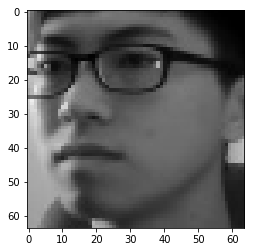

In [8]:
Face_ImageDataList
Facearray = np.array(Face_ImageDataList)

plt.imshow(Facearray[0], cmap='gray')
#Facearray.reshape(1850,4096)
#Facearray
Facearray.shape

### CNN LSTM
https://stackoverflow.com/questions/36992340/how-do-you-pass-video-features-from-a-cnn-to-an-lstm

problem: CNN的input一筆資料是一張圖片，LSTM則是一個影片。所以才要用multistage的方式。

先還是用圖片餵進去試試看
[VGG16](https://riptutorial.com/keras/example/32608/transfer-learning-using-keras-and-vgg)<br>
[Ref](https://machinelearningmastery.com/how-to-develop-rnn-models-for-human-activity-recognition-time-series-classification/)<br>
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]<br>
一個window裡面有許多timestamp，表示LSTM記憶要看幾個frame(幾個timestamp)

In [5]:
from keras.applications.vgg16 import VGG16
from keras import applications
from keras.layers import Input

img_width, img_height = 64, 64

vgg_model = applications.VGG16(weights='imagenet', include_top=False,input_shape = (64, 64, 3))
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [6]:
#在VGG16的block2_pool output再加layer，VGG16的3 4 5就不要了
layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])
layer_dict

{'input_2': <keras.engine.input_layer.InputLayer at 0x1fb81001eb8>,
 'block1_conv1': <keras.layers.convolutional.Conv2D at 0x1fb81001ef0>,
 'block1_conv2': <keras.layers.convolutional.Conv2D at 0x1fb81001f60>,
 'block1_pool': <keras.layers.pooling.MaxPooling2D at 0x1fb81a029b0>,
 'block2_conv1': <keras.layers.convolutional.Conv2D at 0x1fb81a02e80>,
 'block2_conv2': <keras.layers.convolutional.Conv2D at 0x1fb81a4b2b0>,
 'block2_pool': <keras.layers.pooling.MaxPooling2D at 0x1fb81a67470>,
 'block3_conv1': <keras.layers.convolutional.Conv2D at 0x1fb81a679b0>,
 'block3_conv2': <keras.layers.convolutional.Conv2D at 0x1fb81a9e390>,
 'block3_conv3': <keras.layers.convolutional.Conv2D at 0x1fb81abb780>,
 'block3_pool': <keras.layers.pooling.MaxPooling2D at 0x1fb81ade080>,
 'block4_conv1': <keras.layers.convolutional.Conv2D at 0x1fb81ade9b0>,
 'block4_conv2': <keras.layers.convolutional.Conv2D at 0x1fb81b16358>,
 'block4_conv3': <keras.layers.convolutional.Conv2D at 0x1fb81b2e748>,
 'block4_poo

In [7]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import concatenate
#Functional API



Conv2_out = layer_dict['block2_pool'].output

Conv3_out = Conv2D(filters=256, kernel_size=(1, 1), activation='relu', padding='same',kernel_initializer='random_uniform')(Conv2_out)
Conv3_out = Conv2D(filters=256, kernel_size=(1, 1), activation='relu', padding='same',kernel_initializer='random_uniform')(Conv3_out)
Conv3_out = Conv2D(filters=256, kernel_size=(1, 1), activation='relu', padding='same',kernel_initializer='random_uniform')(Conv3_out)
Conv3_Poolout = MaxPooling2D(pool_size=(2, 2))(Conv3_out)

Conv4_out = Conv2D(filters=256, kernel_size=(1, 1), activation='relu', padding='same',kernel_initializer='random_uniform')(Conv3_Poolout)
Conv4_out = Conv2D(filters=256, kernel_size=(1, 1), activation='relu', padding='same',kernel_initializer='random_uniform')(Conv4_out)
Conv4_out = Conv2D(filters=256, kernel_size=(1, 1), activation='relu', padding='same',kernel_initializer='random_uniform')(Conv4_out)
Conv4_Poolout = MaxPooling2D(pool_size=(2, 2))(Conv4_out)

Conv5_out = Conv2D(filters=256, kernel_size=(1, 1), activation='relu', padding='same',kernel_initializer='random_uniform')(Conv4_Poolout)
Conv5_out = Conv2D(filters=256, kernel_size=(1, 1), activation='relu', padding='same',kernel_initializer='random_uniform')(Conv5_out)
Conv5_out = Conv2D(filters=256, kernel_size=(1, 1), activation='relu', padding='same',kernel_initializer='random_uniform')(Conv5_out)
Conv5_Poolout = MaxPooling2D(pool_size=(2, 2))(Conv5_out)


FC6_1 = MaxPooling2D(pool_size=(16, 16))(Conv3_out)
FC6_2 = MaxPooling2D(pool_size=(8, 8))(Conv4_out)
FC6_3 = MaxPooling2D(pool_size=(4, 4))(Conv5_out)

FC6_in=concatenate([FC6_1,FC6_2,FC6_3])

out = Flatten()(FC6_in)
out = Dense(256, activation='relu',kernel_initializer='random_uniform')(out)
out = Dense(256, activation='relu',kernel_initializer='random_uniform')(out)
out = Dense(2, activation='softmax',kernel_initializer='random_uniform')(out)


In [13]:
from keras.models import Model
from keras import optimizers
custom_model = Model(input=vgg_model.input, output=out)

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:7]:
    layer.trainable = False
    print(layer)


sgd = optimizers.SGD(lr=0.000005, decay=0.0005, momentum=0.9, nesterov=True)
# Do not forget to compile it
custom_model.compile(loss='categorical_crossentropy',
                     optimizer=sgd, 
                     metrics=['accuracy'])

custom_model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 64, 64, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 64, 64, 64)   36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 32, 32, 64)   0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


### Plot model

In [11]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from keras.utils import plot_model

plot_model(custom_model, to_file='model.png')

In [13]:
model_result = custom_model.fit(Facearray, Labelarray,
                        batch_size = 1,
                        epochs = 40,
                        verbose = 1)
model_result = custom_model.fit(Eyearray, Labelarray,
                        batch_size = 1,
                        epochs = 40,
                        verbose = 1)


Epoch 1/40
1850/1850 [==============================] - 28s 15ms/step - loss: 0.6119 - acc: 0.6681
Epoch 2/40
1850/1850 [==============================] - 18s 9ms/step - loss: 0.4529 - acc: 0.8005
Epoch 3/40
1850/1850 [==============================] - 18s 10ms/step - loss: 0.3798 - acc: 0.8427
Epoch 4/40
1850/1850 [==============================] - 18s 10ms/step - loss: 0.3382 - acc: 0.8762
Epoch 5/40
1850/1850 [==============================] - 18s 9ms/step - loss: 0.3053 - acc: 0.8865
Epoch 6/40
1850/1850 [==============================] - 18s 10ms/step - loss: 0.2857 - acc: 0.9016
Epoch 7/40
1850/1850 [==============================] - 18s 10ms/step - loss: 0.2701 - acc: 0.9124
Epoch 8/40
1850/1850 [==============================] - 18s 10ms/step - loss: 0.2533 - acc: 0.9216
Epoch 9/40
1850/1850 [==============================] - 18s 9ms/step - loss: 0.2415 - acc: 0.9335
Epoch 10/40
1850/1850 [==============================] - 18s 9ms/step - loss: 0.2306 - acc: 0.9368
Epoch 11/40
1

In [14]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.callbacks import TensorBoard

# define dataset
X = Facearray
y = Labelarray

# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
# 4 samples (X.shape[0])
timesteps = 50
print(X.shape)
X = X.reshape(int(X.shape[0]/timesteps), 1, timesteps, 4096)

print(X.shape)
X

(1850, 64, 64, 3)


ValueError: cannot reshape array of size 22732800 into shape (37,1,50,4096)

In [85]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, 50, 4096)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_43 (TimeDis (None, None, 50, 64)      262208    
_________________________________________________________________
time_distributed_44 (TimeDis (None, None, 25, 64)      0         
_________________________________________________________________
time_distributed_45 (TimeDis (None, None, 1600)        0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)               680400    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 942,709
Trainable params: 942,709
Non-trainable params: 0
_________________________________________________________________


In [86]:
# fit model
model.fit(X, y, epochs=500)
#model.fit(X, y, epochs=50,callbacks=[TensorBoard(log_dir='./log_dir')])

ValueError: Error when checking target: expected dense_15 to have shape (1,) but got array with shape (50,)

In [ ]:
# demonstrate prediction
x_input = array([50, 60, 70, 80])
x_input = x_input.reshape((1, 2, 2, 1))
yhat = model.predict(x_input, verbose=0)

### New model

In [56]:
# Multiple Inputs
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras import backend

eyes_width = 150
eyes_height = 70
mouth_width = 100
mouth_height = 75
face_width = 210
face_height = 250



# first input model: eyes
eyes1 = Input(shape=(eyes_width,eyes_height,1))
conv11 = Conv2D(32, kernel_size=(3, 3), activation='relu')(eyes1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(64, kernel_size=(3, 3), activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)


# second input model: mouth
mouth1 = Input(shape=(mouth_width,mouth_height,1))
conv21 = Conv2D(32, kernel_size=(3, 3), activation='relu')(mouth1)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=(3, 3), activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)


# input model: face
#==========================================================BlockA================================
face1 = Input(shape=(face_width,face_height,1))
conv311 = Conv2D(32, kernel_size=(1, 1), activation='relu',padding='same')(face1)
#conv311 = Flatten()(conv311)

conv321 = Conv2D(32, kernel_size=(1, 1), activation='relu',padding='same')(face1)
conv322 = Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same')(conv321)
#conv322 = Flatten()(conv322)

conv331 = Conv2D(32, kernel_size=(1, 1), activation='relu',padding='same')(face1)
conv332 = Conv2D(48, kernel_size=(3, 3), activation='relu',padding='same')(conv331)
conv333 = Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same')(conv332)
#conv333 = Flatten()(conv333)

print(backend.int_shape(face1)[2])

conv333 = Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same')(conv333)

#face1_flatten =  Flatten()(face1)
BlockA_out = concatenate([conv311, conv322, conv333])

model.add(Lambda(lambda x: BlockA_out+face1))





#==========================================================BlockB================================
conv411 = Conv2D(192, kernel_size=(1, 1), activation='relu',padding='same')(BlockA_out)
#conv411 = Flatten()(conv411)

conv421 = Conv2D(128, kernel_size=(1, 1), activation='relu',padding='same')(BlockA_out)
conv422 = Conv2D(160, kernel_size=(1, 7), activation='relu',padding='same')(conv421)
conv423 = Conv2D(160, kernel_size=(7, 1), activation='relu',padding='same')(conv422)
#conv423 = Flatten()(conv423)

BlockB_out = concatenate([conv411, conv423, BlockA_out])

flat3 = Flatten()(BlockB_out)

merge = concatenate([flat1, flat2,flat3])


model_inspection_resnet = Model(inputs=[eyes1, mouth1, face1], outputs=merge)

250


In [57]:
model_inspection_resnet.summary()


import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from keras.utils import plot_model

plot_model(model_inspection_resnet, to_file='model.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_153 (InputLayer)          (None, 210, 250, 1)  0                                            
__________________________________________________________________________________________________
conv2d_538 (Conv2D)             (None, 210, 250, 32) 64          input_153[0][0]                  
__________________________________________________________________________________________________
conv2d_539 (Conv2D)             (None, 210, 250, 48) 13872       conv2d_538[0][0]                 
__________________________________________________________________________________________________
conv2d_536 (Conv2D)             (None, 210, 250, 32) 64          input_153[0][0]                  
__________________________________________________________________________________________________
conv2d_540

### [InceptionResNet 2](https://medium.com/@mannasiladittya/building-inception-resnet-v2-in-keras-from-scratch-a3546c4d93f0)



In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Concatenate, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, activations



def conv2d(x,numfilt,filtsz,strides=1,pad='same',act=True,name=None):
    x = Conv2D(numfilt,kernel_size = filtsz,strides = strides,padding=pad,data_format='channels_last',use_bias=False,name=name+'conv2d')(x)
    x = BatchNormalization(axis=3,scale=False,name=name+'conv2d'+'bn')(x)
    
    if act:
        x = Activation('relu',name=name+'conv2d'+'act')(x)
    
    return x

def incresA(x,scale,name=None):
    pad = 'same'
    branch0 = conv2d(x,32,1,1,pad,True,name=name+'b0')
    branch1 = conv2d(x,32,1,1,pad,True,name=name+'b1_1')
    branch1 = conv2d(branch1,32,3,1,pad,True,name=name+'b1_2')
    branch2 = conv2d(x,32,1,1,pad,True,name=name+'b2_1')
    branch2 = conv2d(branch2,48,3,1,pad,True,name=name+'b2_2')
    branch2 = conv2d(branch2,64,3,1,pad,True,name=name+'b2_3')
    branches = [branch0,branch1,branch2]
    mixed = Concatenate(axis=3, name=name + '_concat')(branches)
    filt_exp_1x1 = conv2d(mixed,384,1,1,pad,False,name=name+'filt_exp_1x1')
    final_lay = Lambda(lambda inputs, scale: inputs[0] + inputs[1] * scale,
                      output_shape=backend.int_shape(x)[1:],
                      arguments={'scale': scale},
                      name=name+'act_scaling')([x, filt_exp_1x1])
    return final_lay

def incresB(x,scale,name=None):
    pad = 'same'
    branch0 = conv2d(x,192,1,1,pad,True,name=name+'b0')
    branch1 = conv2d(x,128,1,1,pad,True,name=name+'b1_1')
    branch1 = conv2d(branch1,160,[1,7],1,pad,True,name=name+'b1_2')
    branch1 = conv2d(branch1,192,[7,1],1,pad,True,name=name+'b1_3')
    branches = [branch0,branch1]
    mixed = Concatenate(axis=3, name=name + '_mixed')(branches)
    filt_exp_1x1 = conv2d(mixed,1152,1,1,pad,False,name=name+'filt_exp_1x1')
    final_lay = Lambda(lambda inputs, scale: inputs[0] + inputs[1] * scale,
                      output_shape=backend.int_shape(x)[1:],
                      arguments={'scale': scale},
                      name=name+'act_scaling')([x, filt_exp_1x1])
    return final_lay

In [35]:
eyes_width = 150
eyes_height = 70
mouth_width = 100
mouth_height = 75
face_width = 210
face_height = 250
num_classes = 2

# first input model: eyes
eyes1 = Input(shape=(eyes_width,eyes_height,1))
conv11 = Conv2D(32, kernel_size=(3, 3), activation='relu')(eyes1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(64, kernel_size=(3, 3), activation='relu')(pool11)
#pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
#flat1 = Flatten()(pool12)
pool12 = GlobalAveragePooling2D(data_format='channels_last')(conv12)
flat1 = Flatten()(pool12)


# second input model: mouth
mouth1 = Input(shape=(mouth_width,mouth_height,1))
conv21 = Conv2D(32, kernel_size=(3, 3), activation='relu')(mouth1)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=(3, 3), activation='relu')(pool21)
#pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
#flat2 = Flatten()(pool22)
pool22 = GlobalAveragePooling2D(data_format='channels_last')(conv22)
flat2 = Flatten()(pool22)

# input model: face
face1 = Input(shape=(face_width,face_height,1))

x = incresA(face1,0.15,name='incresA_1')

#35 × 35 to 17 × 17 reduction module.
x_red_11 = MaxPooling2D(3,strides=2,padding='valid',name='red_maxpool_1')(x)

x_red_12 = conv2d(x,384,3,2,'valid',True,name='x_red1_c1')

x_red_13 = conv2d(x,256,1,1,'same',True,name='x_red1_c2_1')
x_red_13 = conv2d(x_red_13,256,3,1,'same',True,name='x_red1_c2_2')
x_red_13 = conv2d(x_red_13,384,3,2,'valid',True,name='x_red1_c2_3')

x = Concatenate(axis=3, name='red_concat_1')([x_red_11,x_red_12,x_red_13])

x = incresB(x,0.1,name='incresB_1')

x = GlobalAveragePooling2D(data_format='channels_last')(x)
x = Dropout(0.6)(x)
flat3 = Flatten()(x)

merge = Concatenate(axis=1, name='concat_2')([flat1, flat2,flat3])
output = Dense(num_classes, activation='softmax')(merge)

In [36]:
model = Model(inputs=[eyes1, mouth1, face1], outputs=output, name='inception_resnet_v2')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_57 (InputLayer)           (None, 210, 250, 1)  0                                            
__________________________________________________________________________________________________
incresA_1b2_1conv2d (Conv2D)    (None, 210, 250, 32) 32          input_57[0][0]                   
__________________________________________________________________________________________________
incresA_1b2_1conv2dbn (BatchNor (None, 210, 250, 32) 96          incresA_1b2_1conv2d[0][0]        
__________________________________________________________________________________________________
incresA_1b2_1conv2dact (Activat (None, 210, 250, 32) 0           incresA_1b2_1conv2dbn[0][0]      
__________________________________________________________________________________________________
incresA_1b

In [30]:
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', 
                  show_shapes=True, show_layer_names=True)

### LSTM


In [2]:
import numpy as np
from keras.utils import to_categorical
#注意開頭是數字的資料夾或檔案
labelfile = '.\Dataset\Training_Evaluation_Dataset\Training Dataset\\001\glasses\\001_yawning_drowsiness.txt'
LabelList = []

inputfile = open(labelfile, 'r').read()


LabelList = list(map(int, inputfile))
Labelarray = np.array(LabelList)

Labelarray = to_categorical(Labelarray)
print(Labelarray.shape)
Labelarray[0]

(1850, 2)


array([1., 0.], dtype=float32)

In [2]:
import os

path = '.\\Dataset\\face\\'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if ".jpg" in file:
            files.append(os.path.join(r, file))
        
files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
'''
for f in files:    print(f)
'''


'\nfor f in files:    print(f)\n'

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
Face_ImageDataList = []
for f in files:
    ImgGray = cv2.imread(f,0)
    ImgRGB = cv2.merge((ImgGray,ImgGray,ImgGray))# this line make gray image to RGB
    Face_ImageDataList.append(ImgRGB)   
    #print(f)

(1850, 64, 64, 3)

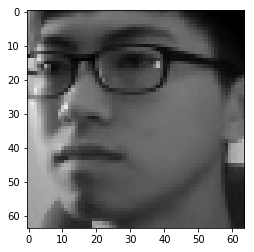

In [4]:
Face_ImageDataList
Facearray = np.array(Face_ImageDataList)

plt.imshow(Facearray[5], cmap='gray')
#Facearray.reshape(1850,4096)
#Facearray
Facearray.shape

In [5]:
Facearray_NEW = Facearray.reshape(1850,64*64*3)
Facearray_NEW.shape

(1850, 12288)

### Step1 Padding Zero to the original array

In [6]:
Facearray_Padding = Facearray_NEW
#Facearray_NEW[0]
ZeroArray = 0 * Facearray_NEW[0]#把某一個feature 乘上0(or 產生shape[1]個0)
print(ZeroArray.shape)
print(type(Facearray_NEW))
print(type(ZeroArray))

(12288,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
timestep = 50
PaddingList = np.array([ZeroArray for i in range(timestep-1)])
print(PaddingList.shape)
print(Facearray_NEW.shape)

PaddingList = np.concatenate((PaddingList,Facearray_NEW),axis=0)
print(PaddingList.shape)
PaddingList

(49, 12288)
(1850, 12288)
(1899, 12288)


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [142, 142, 142, ...,  27,  27,  27],
       [153, 153, 153, ...,  27,  27,  27],
       [154, 154, 154, ...,  29,  29,  29]], dtype=uint8)

### Step2 TimeSequence overlapping

In [13]:
frame_number = Facearray_NEW.shape[0]
FeatureList = []
TempList = []
for j in range(frame_number):
    TempList = []
    for i in range (timestep):#(Facearray_NEW.shape[0]):
        TempList.append(PaddingList[i+j])
    
    FeatureList.append(TempList)
    
LSTM_input_array = np.array(FeatureList)

In [14]:
LSTM_input_array.shape

(1850, 50, 12288)

### LSTM

In [47]:
# http://philipperemy.github.io/keras-stateful-lstm/
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(10, batch_input_shape=(50,LSTM_input_array.shape[1],LSTM_input_array.shape[2]), return_sequences=False, stateful=True))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (50, 10)                  491960    
_________________________________________________________________
dense_4 (Dense)              (50, 2)                   22        
Total params: 491,982
Trainable params: 491,982
Non-trainable params: 0
_________________________________________________________________


In [48]:
import numpy as np
from keras.utils import to_categorical
#注意開頭是數字的資料夾或檔案
labelfile = '.\Dataset\Training_Evaluation_Dataset\Training Dataset\\001\glasses\\001_yawning_drowsiness.txt'
LabelList = []

inputfile = open(labelfile, 'r').read()


LabelList = list(map(int, inputfile))
Labelarray = np.array(LabelList)

Labelarray = to_categorical(Labelarray)
print(Labelarray.shape)

(1850, 2)


In [50]:
model.fit(LSTM_input_array, Labelarray, epochs=100, batch_size=50)

Epoch 1/100
1850/1850 [==============================] - 18s 9ms/step - loss: 0.7237 - acc: 0.5414
Epoch 2/100
1850/1850 [==============================] - 12s 6ms/step - loss: 0.6952 - acc: 0.5443
Epoch 3/100
1600/1850 [========================>.....] - ETA: 1s - loss: 0.6925 - acc: 0.5450

KeyboardInterrupt: 

In [ ]:
num_samples = 235578
batch_size = 200


import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
from math import ceil

from keras.callbacks import EarlyStopping




def LoadImageandLabel(batch_size,AllVideoImageFolder,AllLabelFile):
    #print(Originalpath)
    count=0
    
    #while True:
    
    LabelFileindex = 0
    
    for Originalpath in AllVideoImageFolder:

        labelPath = AllLabelFile[LabelFileindex]
        LabelFileindex = LabelFileindex + 1

        Face_ImageDataList = []
        Eyes_ImageDataList = []
        Mouth_ImageDataList = []
        #=====load all label in a video
        LabelList = []
        TempLabelList = []
        inputfile = open(labelPath, 'r').read()
        TempLabelList = list(map(int, inputfile))

        #=========================

        TEMP_ImageDataList = []

        path = Originalpath+"\\face"


        #=====find all files in path=======    
        Facefiles = []
        Eyefiles = []
        Mouthfiles = []
        # r=root, d=directories, f = files
        for r, d, f in os.walk(path):
            for file in f:
                if ".jpg" in file:
                    temp = os.path.join(r, file)
                    Facefiles.append(temp)
                    Eyefiles.append(temp.replace("face", "eyes"))
                    Mouthfiles.append(temp.replace("face", "mouth"))


        Facefiles.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
        Eyefiles.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
        Mouthfiles.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

        for FileIndex in range(len(Facefiles)):
            #======================load label

            index = Facefiles[FileIndex].find('frame')
            framenumber =int(Facefiles[FileIndex][index+5:-4]) 

            #print(framenumber)

            #if(judgeflag == 0 and TempLabelList[framenumber-1] == 1):
            #    judgeflag = 1
                #print(framenumber-1)

            #Labelarray = np.array(LabelList)

            Labelarray = to_categorical(TempLabelList[framenumber-1], num_classes=2)
            LabelList.append(Labelarray)
            #print(LabelList)


                #Labelarray = np.array(LabelList)
                #Labelarray = to_categorical(Labelarray, num_classes=2)

            #================================
            ImgGray = cv2.imread(Facefiles[FileIndex],0)
            #ImgRGB = cv2.merge((ImgGray,ImgGray,ImgGray))# this line make gray image to RGB
            #TEMP_ImageDataList.append(ImgRGB)  
            ImgGray = ImgGray.reshape(ImgGray.shape[0],ImgGray.shape[1],1)
            #print(ImgGray.shape)
            Face_ImageDataList.append(ImgGray)
            #print(np.array(Face_ImageDataList).shape)

            ImgGray = cv2.imread(Mouthfiles[FileIndex],0)
            ImgGray = ImgGray.reshape(ImgGray.shape[0],ImgGray.shape[1],1)
            Mouth_ImageDataList.append(ImgGray)


            ImgGray = cv2.imread(Eyefiles[FileIndex],0)
            ImgGray = ImgGray.reshape(ImgGray.shape[0],ImgGray.shape[1],1)
            Eyes_ImageDataList.append(ImgGray)
             #====================================

            count = count +1
            if count>=batch_size:

                    yield ([np.array(Eyes_ImageDataList),np.array(Mouth_ImageDataList),np.array(Face_ImageDataList)],np.array(LabelList))
                    count=0
                    Face_ImageDataList = []
                    Eyes_ImageDataList = []
                    Mouth_ImageDataList = []
                    LabelList = []
               